## CIFAR 100 Dataset

#### Superclass	Classes
* aquatic mammals	beaver, dolphin, otter, seal, whale
* fish	aquarium fish, flatfish, ray, shark, trout
* flowers	orchids, poppies, roses, sunflowers, tulips
* food containers	bottles, bowls, cans, cups, plates
* fruit and vegetables	apples, mushrooms, oranges, pears, sweet peppers
* household electrical devices	clock, computer keyboard, lamp, telephone, television
* household furniture	bed, chair, couch, table, wardrobe
* insects	bee, beetle, butterfly, caterpillar, cockroach
* large carnivores	bear, leopard, lion, tiger, wolf
* large man-made outdoor things	bridge, castle, house, road, skyscraper
* large natural outdoor scenes	cloud, forest, mountain, plain, sea
* large omnivores and herbivores	camel, cattle, chimpanzee, elephant, kangaroo
* medium-sized mammals	fox, porcupine, possum, raccoon, skunk
* non-insect invertebrates	crab, lobster, snail, spider, worm
* people	baby, boy, girl, man, woman
* reptiles	crocodile, dinosaur, lizard, snake, turtle
* small mammals	hamster, mouse, rabbit, shrew, squirrel
* trees	maple, oak, palm, pine, willow
* vehicles 1	bicycle, bus, motorcycle, pickup truck, train
* vehicles 2	lawn-mower, rocket, streetcar, tank, tractor

This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [4]:
from keras.datasets import cifar100
(X_train,y_train), (X_test,y_test)=cifar100.load_data()

169009152/169001437 [==============================] - 4s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
X_test.shape

(10000, 32, 32, 3)

[42]


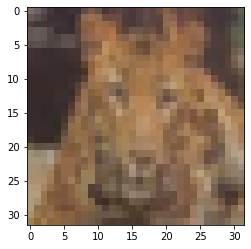

In [8]:
i=5000
plt.imshow(X_train[i])
print(y_train[i])

D:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


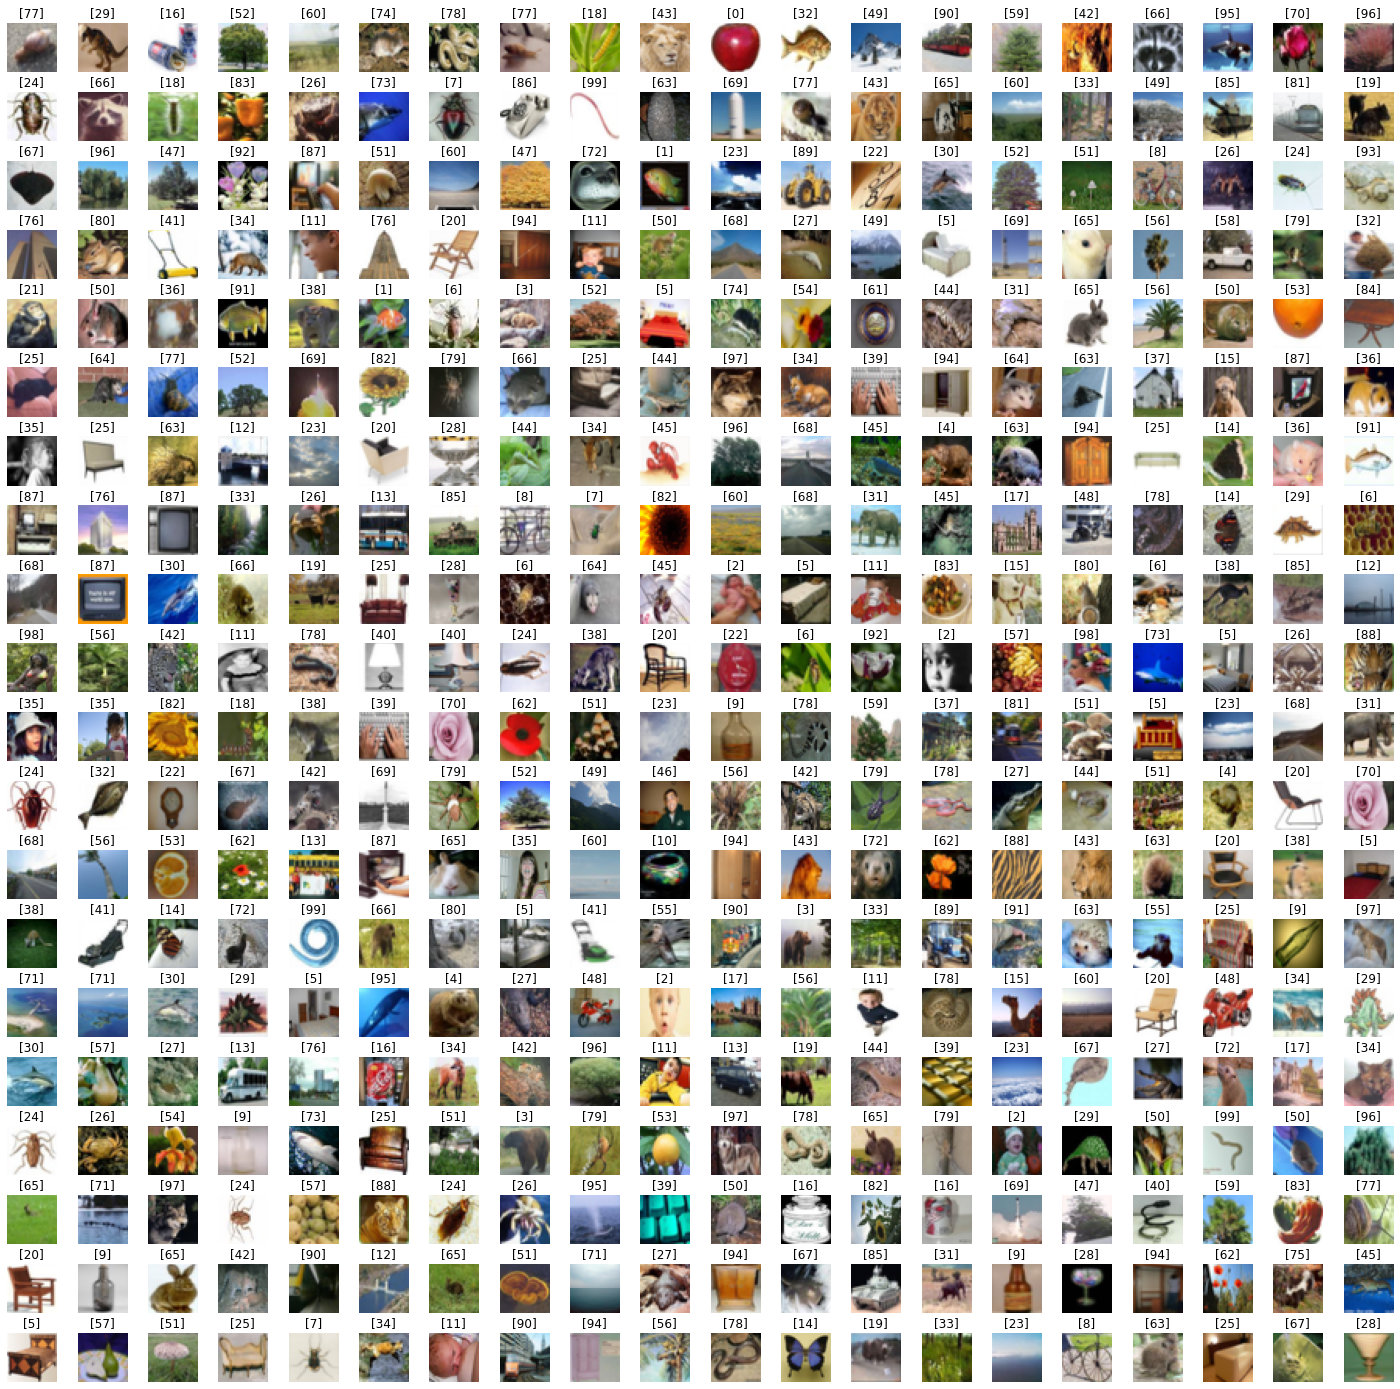

In [9]:
W_grid = 20
L_grid = 20

fig,axis = plt.subplots(L_grid, W_grid,figsize = (25,25))
axis = axis.ravel()
n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0,n_training)
    axis[i].imshow(X_train[index])
    axis[i].set_title(y_train[index])
    axis[i].axis('off')
# to space out the images use the hspace    
plt.subplots_adjust(hspace= 0.4)
    

## Prepare the Data for usage

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [19]:
number_cat = 100

In [17]:
y_train

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [20]:
import keras
y_train = keras.utils.to_categorical(y_train,number_cat )
y_test = keras.utils.to_categorical(y_test,number_cat)

In [21]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
# Data Normalization
X_train= X_train/255
X_test= X_test/255

In [24]:
X_train

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.7647059 , 0.8039216 , 0.75686276],
         [0.83137256, 0.8784314 , 0.8       ],
         [0.7137255 , 0.7607843 , 0.654902  ]],

        [[1.        , 1.        , 1.        ],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         ...,
         [0.6666667 , 0.6901961 , 0.5882353 ],
         [0.6313726 , 0.65882355, 0.50980395],
         [0.57254905, 0.6039216 , 0.44313726]],

        [[1.        , 1.        , 1.        ],
         [0.99607843, 0.99607843, 0.99607843],
         [1.        , 1.        , 1.        ],
         ...,
         [0.7411765 , 0.78039217, 0.6627451 ],
         [0.6509804 , 0.69803923, 0.50980395],
         [0.4745098 , 0.52156866, 0.34117648]],

        ...,

        [[0.5803922 , 0.7254902 , 0.30980393],
         [0.5568628 , 0.7137255 , 0.22352941]

In [25]:
Input_shape = X_train.shape[1:]

In [26]:
Input_shape

(32, 32, 3)

## Training the Model

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [31]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 128, kernel_size =(3,3),activation='relu',input_shape = Input_shape))
cnn_model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters = 256, kernel_size =(3,3),activation='relu'))
cnn_model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())
cnn_model.add(Dense(units=512,activation='relu'))

cnn_model.add(Dense(units=512,activation='relu'))
cnn_model.add(Dense(units= 100, activation='softmax'))



In [32]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.rmsprop(lr= 0.001), metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(X_train,y_train,batch_size=32,epochs = 10,shuffle = True)

Epoch 1/10
50000/50000 [==============================] - 578s 12ms/step - loss: 3.9602 - accuracy: 0.0990
Epoch 2/10
50000/50000 [==============================] - 568s 11ms/step - loss: 3.1573 - accuracy: 0.2339
Epoch 3/10
 5664/50000 [==>...........................] - ETA: 8:24 - loss: 2.7590 - accuracy: 0.3164